Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


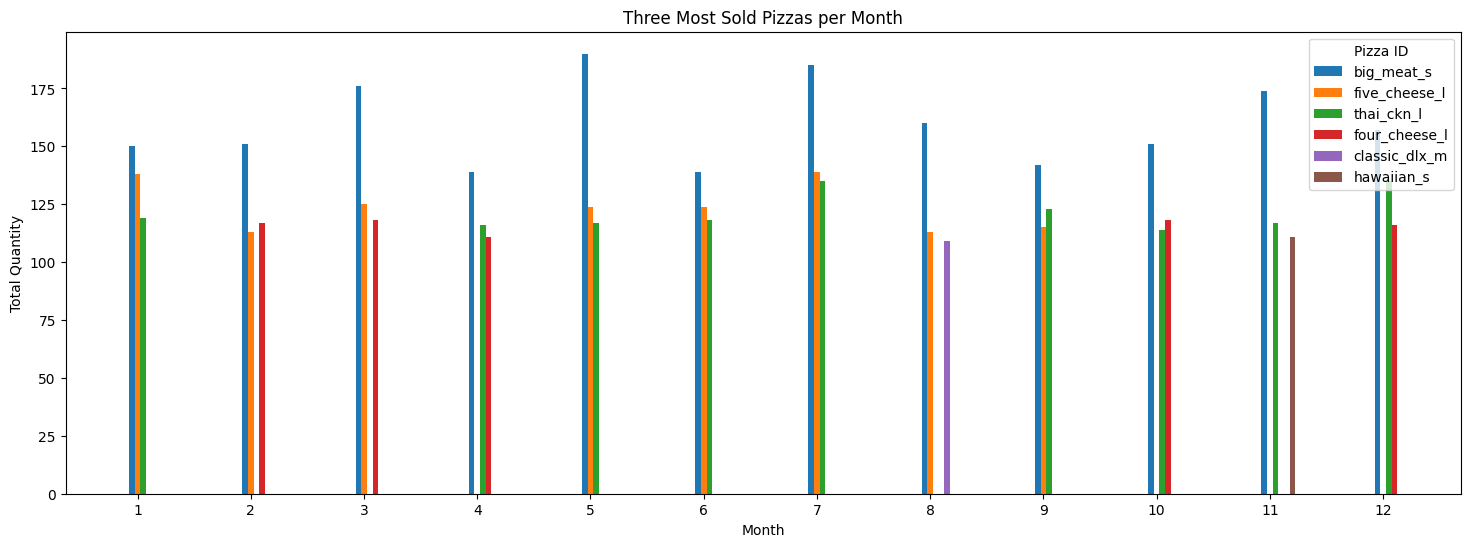

In [9]:
from google.colab import drive
import shutil
import pandas as pd
import matplotlib.pyplot as plt

# Mount google drive on google colab
drive.mount('/content/drive')

# Copy the CSV file from google drive to google colab
shutil.copy('/content/drive/MyDrive/University/5-Semester/Bases-de-Datos/Proyecto/Resultados/01_result.csv', '01_result.csv')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('01_result.csv')

# Group by 'mes' and 'pizza_id', and calculate the sum of 'cantidad' for each combination
df_grouped = df.groupby(['mes', 'pizza_id'])['cantidad'].sum().reset_index()

# Find the three most sold pizzas for each month
top_3_pizzas_per_month = df_grouped.groupby('mes').apply(lambda x: x.nlargest(3, 'cantidad')).reset_index(drop=True)

# Create the bar chart
fig, ax = plt.subplots(figsize=(18, 6))

width = 0.05
for i, pizza in enumerate(top_3_pizzas_per_month['pizza_id'].unique()):
    data = top_3_pizzas_per_month[top_3_pizzas_per_month['pizza_id'] == pizza]
    x = data['mes'] + i * width
    y = data['cantidad']
    ax.bar(x, y, width=width, label=pizza)

ax.set_xlabel('Month')
ax.set_ylabel('Total Quantity')
ax.set_title('Three Most Sold Pizzas per Month')
ax.set_xticks(df_grouped['mes'].unique() + width)
ax.set_xticklabels(df_grouped['mes'].unique())
ax.legend(title='Pizza ID')

plt.show()